In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import pymysql
import mysql.connector
from scipy import stats
from scipy.stats import iqr
from statistics import mode 
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.ticker as mticker
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import scipy.spatial.distance as sdist
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
pd.options.display.float_format = '{:20,.2f}'.format

In [9]:
experience = pd.read_csv('experience.csv')
engagement = pd.read_csv('engagement.csv')

In [10]:
experience

,Customer_Number,Experience_Score
0,"33,659,822,913.00",1.41
1,"33,604,515,716.00",1.31
2,"33,658,316,284.00",1.01
3,"33,667,158,309.00",0.72
4,"33,760,037,345.00",0.87
...,...,...
106851,"33,607,833,304.00",0.11
106852,"33,626,357,513.00",0.12
106853,"33,762,062,356.00",0.09
106854,"33,614,777,138.00",0.12


In [11]:
engagement

,Customer_Number,Engagement_Score
0,"33,626,320,676.00",1.58
1,"33,614,892,860.00",1.54
2,"33,625,779,332.00",1.49
3,"33,659,725,664.00",1.50
4,"33,675,877,202.00",1.46
...,...,...
106851,"33,650,431,620.00",0.06
106852,"33,698,390,293.00",0.06
106853,"33,659,328,207.00",0.05
106854,"33,665,660,120.00",0.05


In [19]:
satisfaction = experience.merge(engagement, on='Customer_Number')
satisfaction["Customer_Number"]= satisfaction["Customer_Number"].astype(str) 
satisfaction

,Customer_Number,Experience_Score,Engagement_Score
0,33659822913.0,1.41,0.77
1,33604515716.0,1.31,1.02
2,33658316284.0,1.01,0.47
3,33667158309.0,0.72,0.27
4,33760037345.0,0.87,0.50
...,...,...,...
106851,33607833304.0,0.11,0.04
106852,33626357513.0,0.12,0.03
106853,33762062356.0,0.09,0.04
106854,33614777138.0,0.12,0.03


In [20]:
satisfaction['Satisfaction_Score'] = satisfaction['Experience_Score'] + satisfaction['Engagement_Score'] 
satisfaction['Satisfaction_Score'] = satisfaction['Satisfaction_Score'].apply(lambda x: x/2 )
satisfaction

,Customer_Number,Experience_Score,Engagement_Score,Satisfaction_Score
0,33659822913.0,1.41,0.77,1.09
1,33604515716.0,1.31,1.02,1.16
2,33658316284.0,1.01,0.47,0.74
3,33667158309.0,0.72,0.27,0.49
4,33760037345.0,0.87,0.50,0.69
...,...,...,...,...
106851,33607833304.0,0.11,0.04,0.07
106852,33626357513.0,0.12,0.03,0.07
106853,33762062356.0,0.09,0.04,0.06
106854,33614777138.0,0.12,0.03,0.08


In [23]:
satisfaction_score = satisfaction.sort_values('Satisfaction_Score', ascending=False).reset_index(drop=True)

In [59]:
top_10 = satisfaction_score.head(10)

In [60]:
top_10

,Customer_Number,Experience_Score,Engagement_Score,Satisfaction_Score
0,33614892860.0,1.27,1.54,1.40
1,33675877202.0,1.29,1.46,1.37
2,33626320676.0,1.06,1.58,1.32
3,33659725664.0,1.11,1.50,1.30
4,33625779332.0,1.01,1.49,1.25
5,33760536639.0,1.00,1.50,1.25
6,33604515716.0,1.31,1.02,1.16
7,33658263267.0,1.34,0.99,1.16
8,33659359429.0,1.02,1.16,1.09
9,33659822913.0,1.41,0.77,1.09


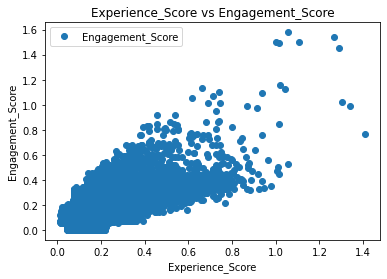

In [26]:
satisfaction_score.plot(x='Experience_Score', y='Engagement_Score', style='o')
plt.title('Experience_Score vs Engagement_Score')
plt.xlabel('Experience_Score')
plt.ylabel('Engagement_Score')
plt.show()

In [28]:
X = satisfaction_score['Experience_Score'].values.reshape(-1, 1)
y = satisfaction_score['Engagement_Score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(regressor.intercept_)


-0.01619779193796625


In [30]:
print(regressor.coef_)

[0.60867565]


In [32]:
y_pred = regressor.predict(X_test)
y_pred

array([0.05955763, 0.01213788, 0.07339853, ..., 0.02669702, 0.02625622,
       0.05956269])

In [33]:
aggregated = satisfaction[['Experience_Score', 'Engagement_Score']]
aggregated

,Experience_Score,Engagement_Score
0,1.41,0.77
1,1.31,1.02
2,1.01,0.47
3,0.72,0.27
4,0.87,0.50
...,...,...
106851,0.11,0.04
106852,0.12,0.03
106853,0.09,0.04
106854,0.12,0.03


In [34]:
x = aggregated.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(scaled_array)
X = df_normalized.values

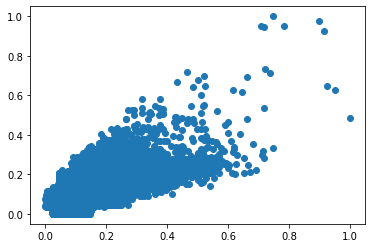

In [35]:
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

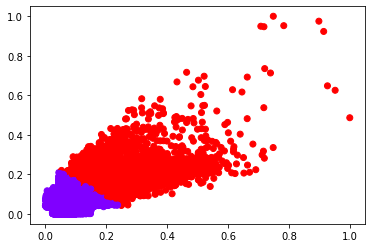

In [37]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

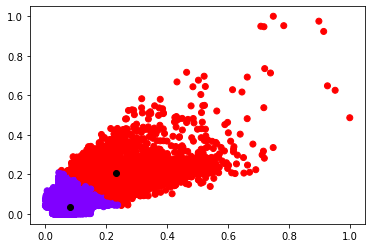

In [61]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.savefig('scat_4.png', dpi=300)

In [39]:
aggregated['cluster'] = kmeans.labels_

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
aggregated['Satisfaction_Score'] = satisfaction['Satisfaction_Score']

In [41]:
aggregated

,Experience_Score,Engagement_Score,cluster,Satisfaction_Score
0,1.41,0.77,1,1.09
1,1.31,1.02,1,1.16
2,1.01,0.47,1,0.74
3,0.72,0.27,1,0.49
4,0.87,0.50,1,0.69
...,...,...,...,...
106851,0.11,0.04,0,0.07
106852,0.12,0.03,0,0.07
106853,0.09,0.04,0,0.06
106854,0.12,0.03,0,0.08


In [42]:
segments = aggregated.groupby('cluster', as_index=False).agg({'Satisfaction_Score': 'mean', 
                                                              'Experience_Score': 'mean'})
segments

,cluster,Satisfaction_Score,Experience_Score
0,0,0.09,0.13
1,1,0.33,0.34


In [55]:


hostname="####"
dbname="####"
uname="####"
pwd="#######"

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table                                   
satisfaction_score.to_sql('satisfaction', engine, index=False)